In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting the Dimensions of Images

In [36]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
dataset = train_datagen.flow_from_directory('training/PlantVillage',
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True  )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Found 2152 images belonging to 3 classes.


In [6]:
dataset.labels.shape

(2152,)

In [7]:
class_indices = dataset.class_indices
class_names = {v: k for k, v in class_indices.items()}
class_names

{0: 'Potato___Early_blight', 1: 'Potato___Late_blight', 2: 'Potato___healthy'}

In [8]:
images, labels = next(dataset)
labels.shape

(32, 3)

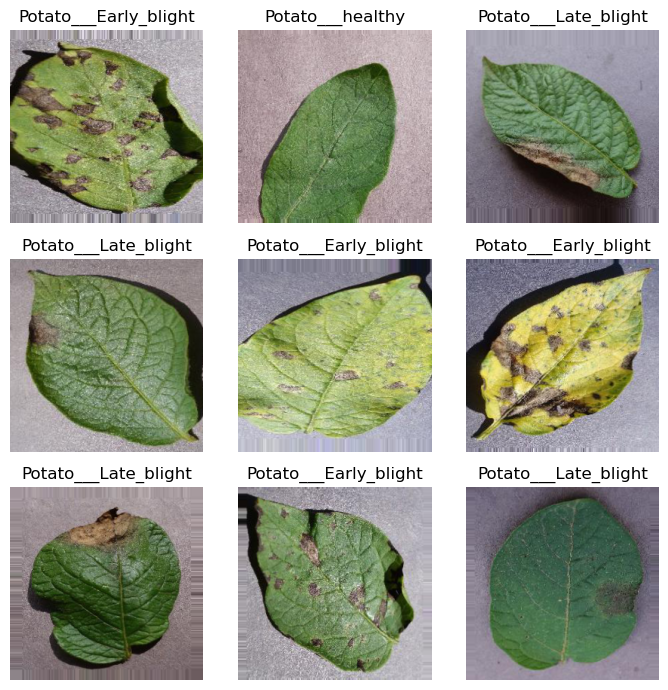

In [9]:
plt.figure(figsize=(7, 7))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Train Test Splitting

In [8]:
import splitfolders

# Define paths
input_folder = 'training/PlantVillage'  # This folder should contain subfolders for each class
output_folder = 'training/dataset'  # This is where the split datasets will be saved

# Split the input folder into train, val, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.1, 0.2))


Copying files: 2152 files [00:08, 241.84 files/s]


In [10]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    'training/dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    'training/dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'training/dataset/test',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1968 images belonging to 3 classes.
Found 409 images belonging to 3 classes.
Found 777 images belonging to 3 classes.


# Model Building

In [13]:
input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

cnn = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the CNN

In [27]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history = cnn.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    verbose=1,
    epochs=50,
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.4857 - loss: 0.9364 - val_accuracy: 0.6724 - val_loss: 0.7771
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7237 - loss: 0.6931 - val_accuracy: 0.7971 - val_loss: 0.4559
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8088 - loss: 0.4553 - val_accuracy: 0.7628 - val_loss: 0.6186
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.8498 - loss: 0.3830 - val_accuracy: 0.8166 - val_loss: 0.4336
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8905 - loss: 0.2902 - val_accuracy: 0.9095 - val_loss: 0.2016
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9048 - loss: 0.2300 - val_accuracy: 0.8313 - val_loss: 0.4709
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9158 - loss: 0.2187 - val_accuracy: 0.9462 - val_loss: 0.1291
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9326 - loss: 0.1687 - val_accuracy: 0.8851 - v

In [38]:
# Save the model using the recommended Keras format
cnn.save("my_model2.keras")


In [39]:
model = load_model("my_model2.keras")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
scores = model.evaluate(test_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.9949 - loss: 0.0124


In [41]:
scores

[0.026880409568548203, 0.9884169697761536]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

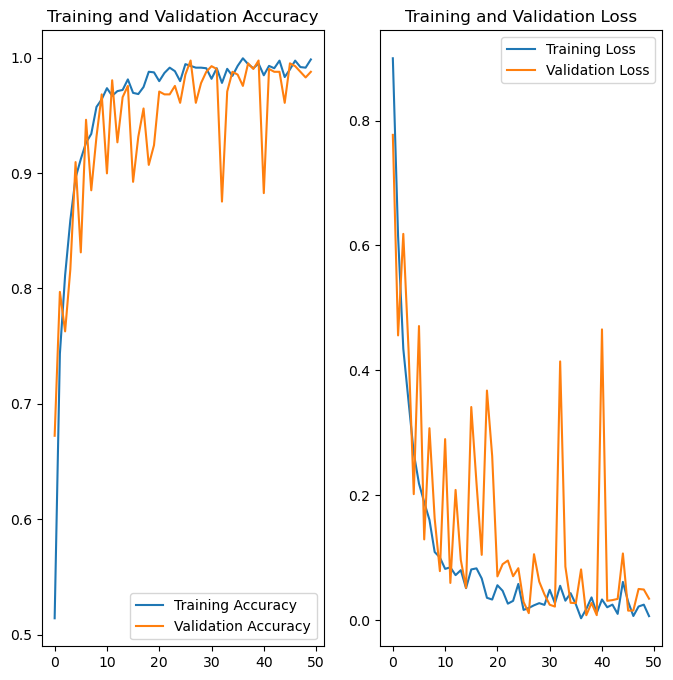

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
from tensorflow.keras.preprocessing import image


def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale pixel values
    return img_array

# Function to predict class for an image
def predict_image_class(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    return predicted_class


image_path = 'training/dataset/test/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'
predicted_class = predict_image_class(image_path)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Predicted class: Potato___Early_blight
